<a href="https://colab.research.google.com/github/YatindraRai002/Neural-Network/blob/main/perceptron_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv('/content/college_student_placement_dataset.csv')

In [5]:
print(df.shape)
df.head(10)

(10000, 10)


,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No
5,CLG0015,96,5.26,5.32,7,No,5,8,0,No
6,CLG0071,123,6.68,6.58,5,No,7,8,2,Yes
7,CLG0096,111,8.77,8.76,7,No,3,1,2,Yes
8,CLG0097,92,6.47,6.33,9,No,7,8,5,No
9,CLG0057,108,8.82,8.60,4,No,5,9,1,No


<Axes: xlabel='CGPA', ylabel='IQ'>

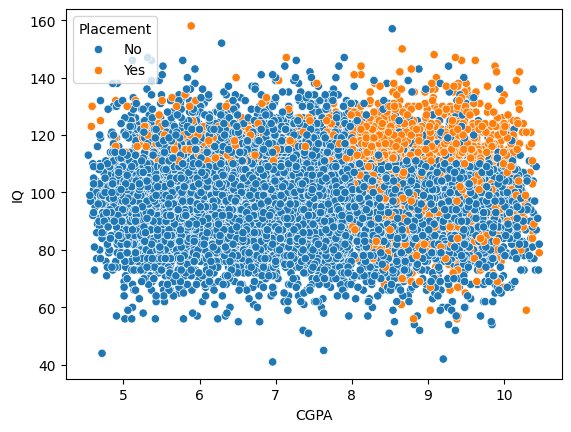

In [13]:
sns.scatterplot(x=df['CGPA'], y=df['IQ'], hue = df['Placement'])

In [16]:
x = df.iloc[:, 1:9]
y = df.iloc[:,-1]

In [17]:
from sklearn.linear_model import Perceptron
p= Perceptron()

In [19]:
from sklearn.preprocessing import LabelEncoder

# Create copies to avoid modifying original x and y if they are used later, and to avoid SettingWithCopyWarning.
x_transformed = x.copy()
y_transformed = y.copy()

# Encode 'Internship_Experience' column in x
le_internship = LabelEncoder()
x_transformed['Internship_Experience'] = le_internship.fit_transform(x_transformed['Internship_Experience'])

# Encode the target variable y
le_placement = LabelEncoder()
y_transformed = le_placement.fit_transform(y_transformed)

# Fit the Perceptron model with encoded data
p.fit(x_transformed, y_transformed)

Perceptron()

preceptron trick

In [22]:
# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_transformed, y_transformed, test_size=0.2, random_state=42)

# Fit the Perceptron model on the training data
p.fit(x_train, y_train)

# Make predictions on the test data
y_pred = p.predict(x_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Perceptron Model Accuracy: {accuracy:0.2f}")

Perceptron Model Accuracy: 0.73


In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Instantiate Perceptron model
perceptron_model = Perceptron(random_state=42)

# Define the parameter grid for Perceptron
param_grid = {
    'max_iter': [1000, 2000, 3000],
    'eta0': [0.001, 0.01, 0.1],
    'alpha': [0.0001, 0.001, 0.01]
}

# Scale the features for Perceptron, as it is sensitive to feature scaling
scaler = StandardScaler()
x_train_scaled_perceptron = scaler.fit_transform(x_train)
x_test_scaled_perceptron = scaler.transform(x_test)

# Create GridSearchCV object
grid_search = GridSearchCV(
    estimator=perceptron_model,
    param_grid=param_grid,
    cv=5, # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1 # Use all available cores
)

# Fit GridSearchCV to the training data
grid_search.fit(x_train_scaled_perceptron, y_train)

# Print the best parameters and best score
print("Best parameters for Perceptron:", grid_search.best_params_)
print("Best cross-validation accuracy for Perceptron:", grid_search.best_score_)

Best parameters for Perceptron: {'alpha': 0.0001, 'eta0': 0.1, 'max_iter': 1000}
Best cross-validation accuracy for Perceptron: 0.866375


In [33]:
best_perceptron = Perceptron(random_state=42, **grid_search.best_params_)
best_perceptron.fit(x_train_scaled_perceptron, y_train)

y_pred_tuned_perceptron = best_perceptron.predict(x_test_scaled_perceptron)
accuracy_tuned_perceptron = accuracy_score(y_test, y_pred_tuned_perceptron)

print(f"Tuned Perceptron Model Accuracy: {accuracy_tuned_perceptron:.2f}")


Tuned Perceptron Model Accuracy: 0.86


In [34]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)

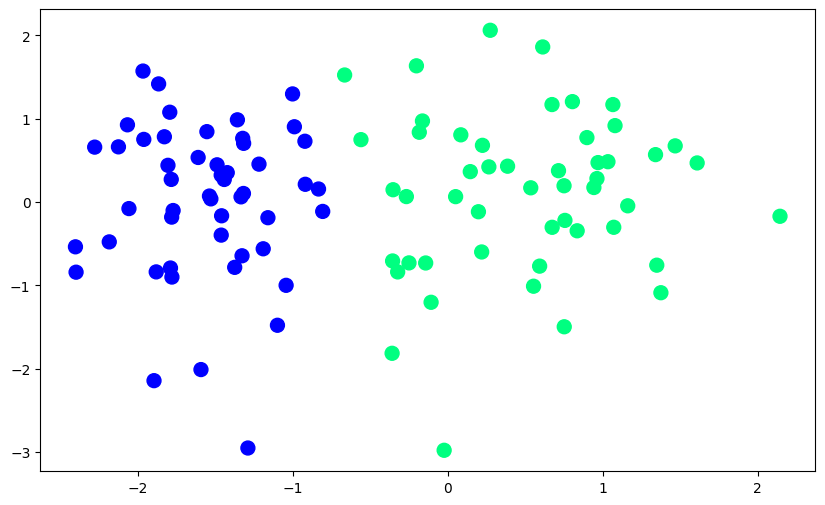

In [35]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [36]:
def perceptron(X,y):

    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1

    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]

    return weights[0],weights[1:]


In [37]:
def step(z):
    return 1 if z>0 else 0
intercept_,coef_ = perceptron(X,y)
print(coef_)
print(intercept_)

[1.37170916 0.14920573]
0.8


(-3.0, 2.0)

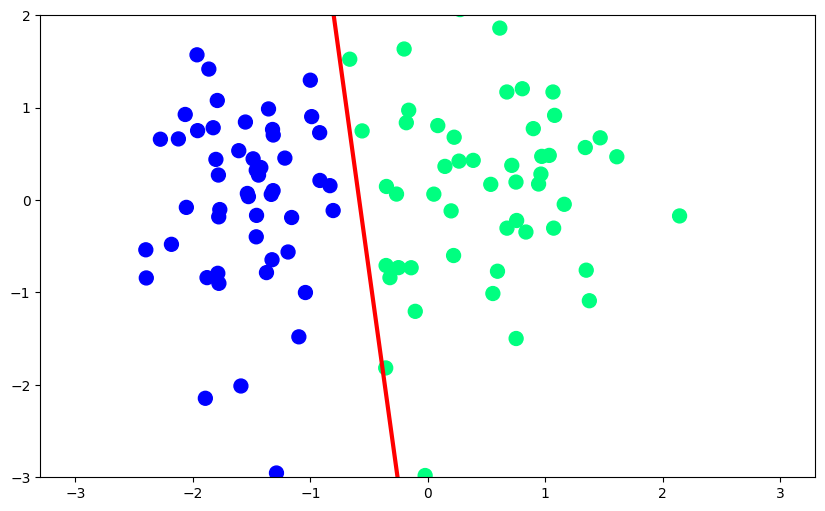

In [38]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)